 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Create paths for all csv's 
aapl_historical_Path = Path('Resources/aapl_historical.csv')
algo_returns_Path = Path('Resources/algo_returns.csv')
cost_historical_Path = Path('Resources/cost_historical.csv')
goog_historical_Path = Path('Resources/goog_historical.csv')
sp500_history_Path = Path('Resources/sp500_history.csv') 
whale_return_Path = Path('Resources/whale_returns.csv')

# Reading whale returns & adusting index to date and formating the data typeof date 
whale_returns = pd.read_csv(whale_return_Path, parse_dates=True, index_col="Date", infer_datetime_format=True)
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_returns_Path, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_returns = pd.read_csv(sp500_history_Path, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_returns.sort_index(inplace=True)

In [9]:
# Check Data Types
sp500_returns.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].str.replace("$", "")
sp500_returns['Close'] = sp500_returns['Close'].astype('float')


/Users/thomaspalmisano/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [11]:
# Calculate Daily Returns
daily_returns = sp500_returns.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
daily_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = daily_returns.rename(columns={"Close": "sp500_Daily_Returns"})
sp500_returns.head()


,sp500_Daily_Returns
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
W_algo_sp500_returns = pd.concat([sp500_returns, algo_returns, whale_returns], axis="columns", join="inner")
W_algo_sp500_returns.head()

,sp500_Daily_Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-02,0.006125,-0.008158,0.003200,NaN,NaN,NaN,NaN
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

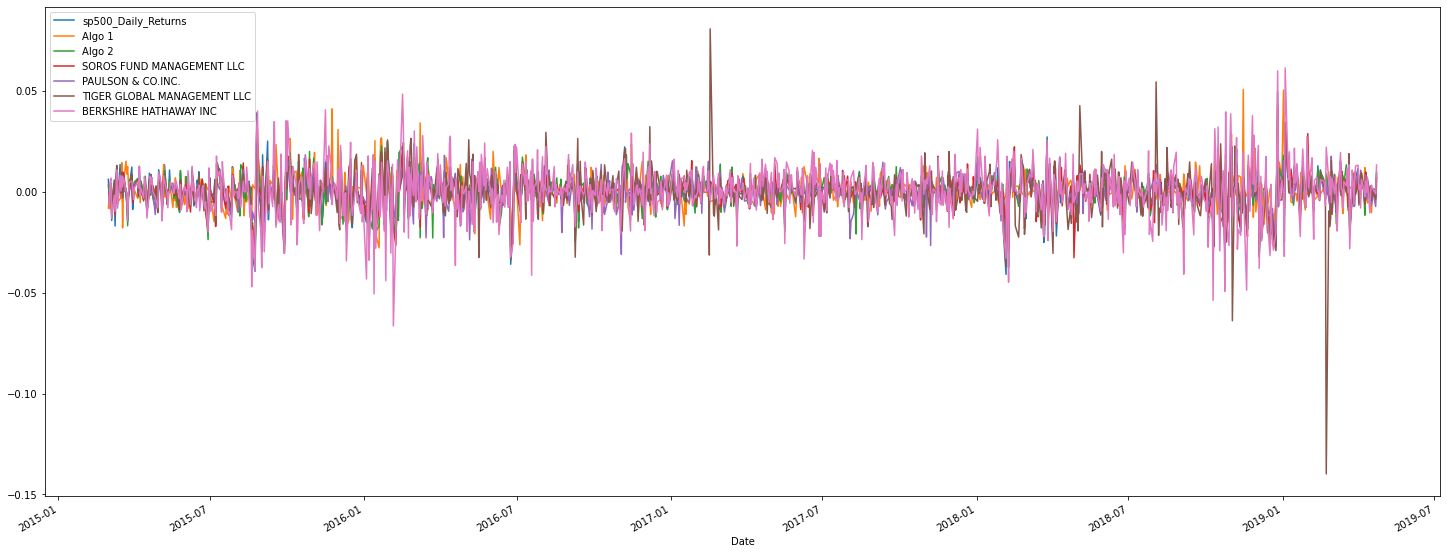

In [15]:
# Plot daily returns of all portfolios

W_algo_sp500_returns.plot(figsize=(25,10)) #.hist(stacked=True, bins=100)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

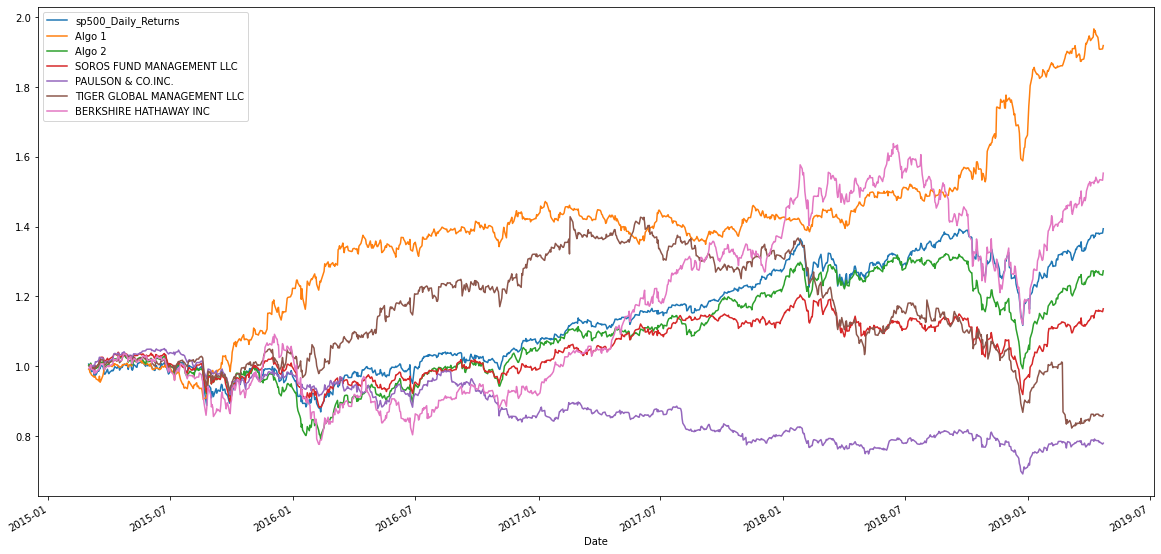

In [16]:
# Calculate cumulative returns of all portfolios
cum_returns = (1+ W_algo_sp500_returns).cumprod()
#cum_returns.sort_values(by='Date') 
# Plot cumulative returns
cum_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

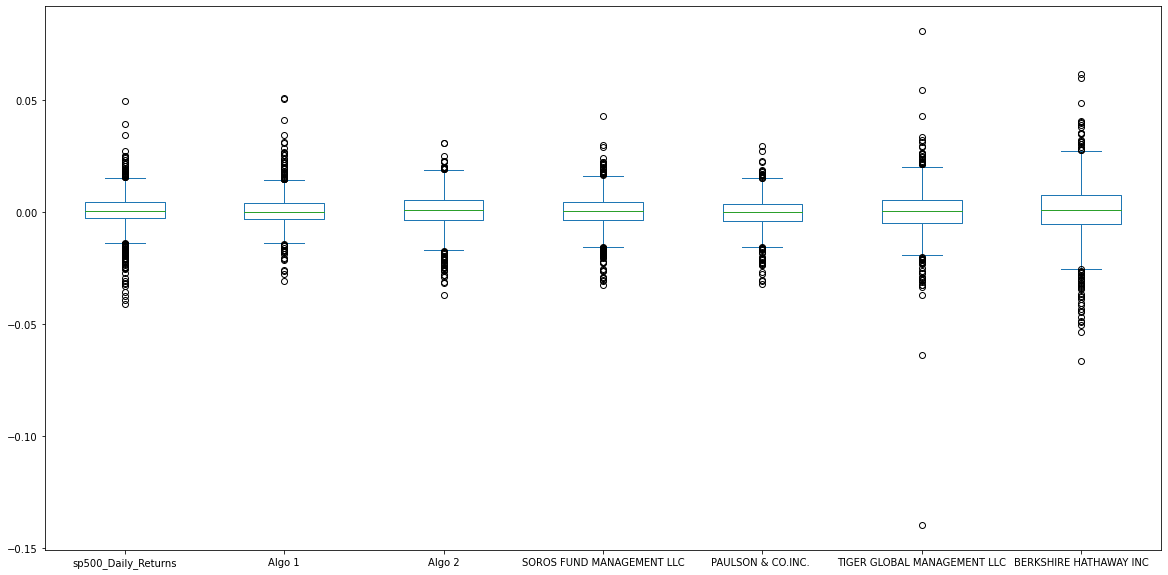

In [17]:
# Box plot to visually show risk
W_algo_sp500_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = W_algo_sp500_returns.std()
daily_std

sp500_Daily_Returns            0.008551
Algo 1                         0.007621
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
sp500_Daily_Returns            0.008551
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std*np.sqrt(252)
annual_std

sp500_Daily_Returns            0.135751
Algo 1                         0.120987
Algo 2                         0.132374
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

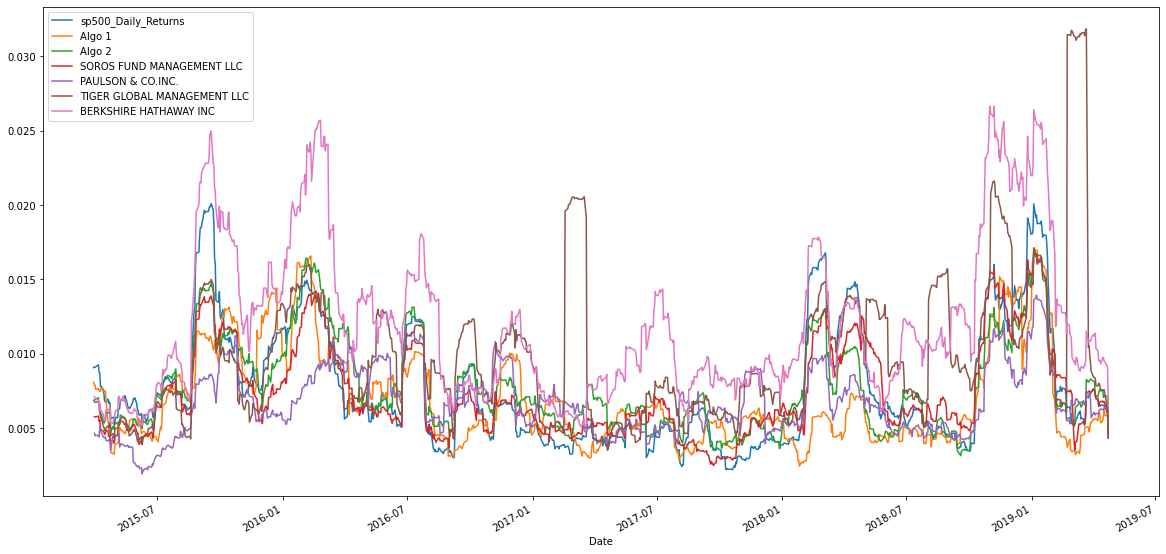

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_21_std = W_algo_sp500_returns.rolling(window=21).std()
# Plot the rolling standard deviation
Rolling_21_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

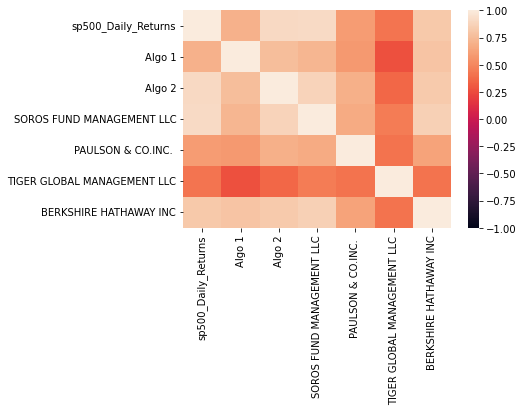

In [22]:
# Calculate the correlation
correlation = Rolling_21_std.corr()
correlation
# Display de correlation matrix 
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
# Calculate covariance of a single portfolio coveriance direct relationship between two variables 
covar = W_algo_sp500_returns['Algo 1'].cov(W_algo_sp500_returns['sp500_Daily_Returns'])
covar
# Calculate variance of S&P 500
var = W_algo_sp500_returns['sp500_Daily_Returns'].var()
# Computing beta
algo1_Beta = covar / var 
algo1_Beta
# Plot beta trend
#algo1_Beta.plot()

0.24821490977532573

<AxesSubplot:title={'center':'beta trend for alg0 1 in relation to sp500'}, xlabel='Date'>

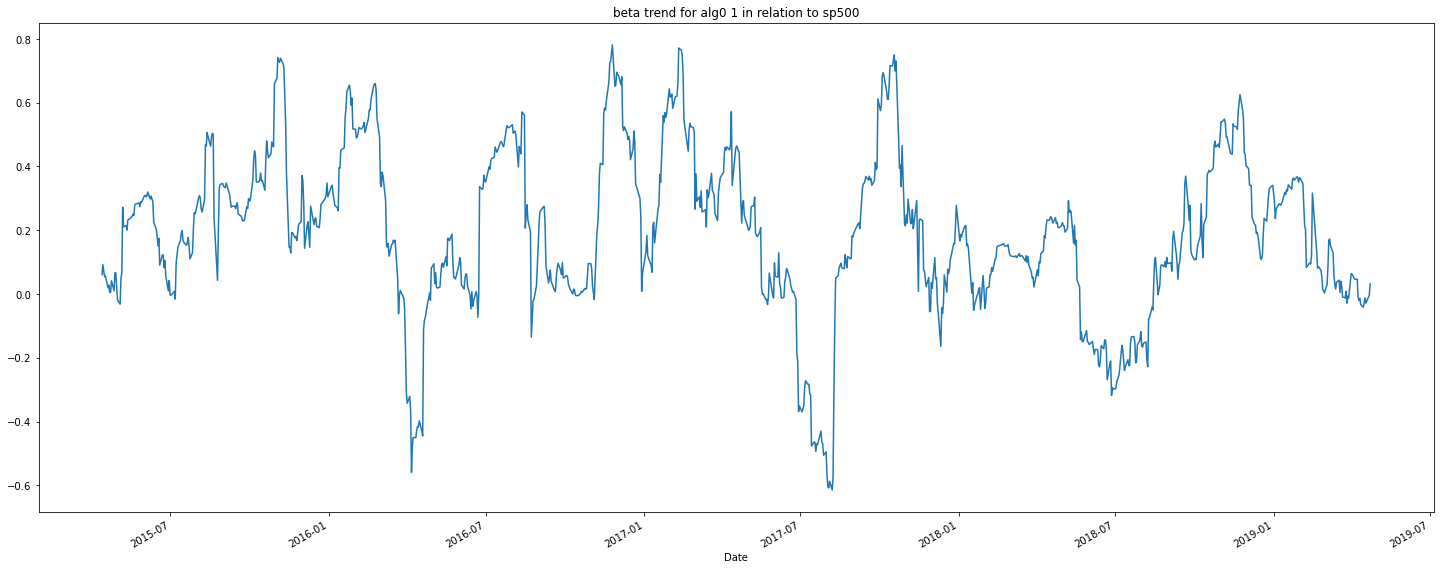

In [24]:
#plotting beta trend with rolling covariaince and rolling variance 
roll_covar = W_algo_sp500_returns['Algo 1'].rolling(window=30).cov(W_algo_sp500_returns['sp500_Daily_Returns'])
roll_var = W_algo_sp500_returns['sp500_Daily_Returns'].rolling(window=30).var()
roll_beta = roll_covar / roll_var 
roll_beta.plot(figsize=(25,10), title='beta trend for alg0 1 in relation to sp500')


# Rolling Statistics Challenge: Exponentially Weighted Average An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

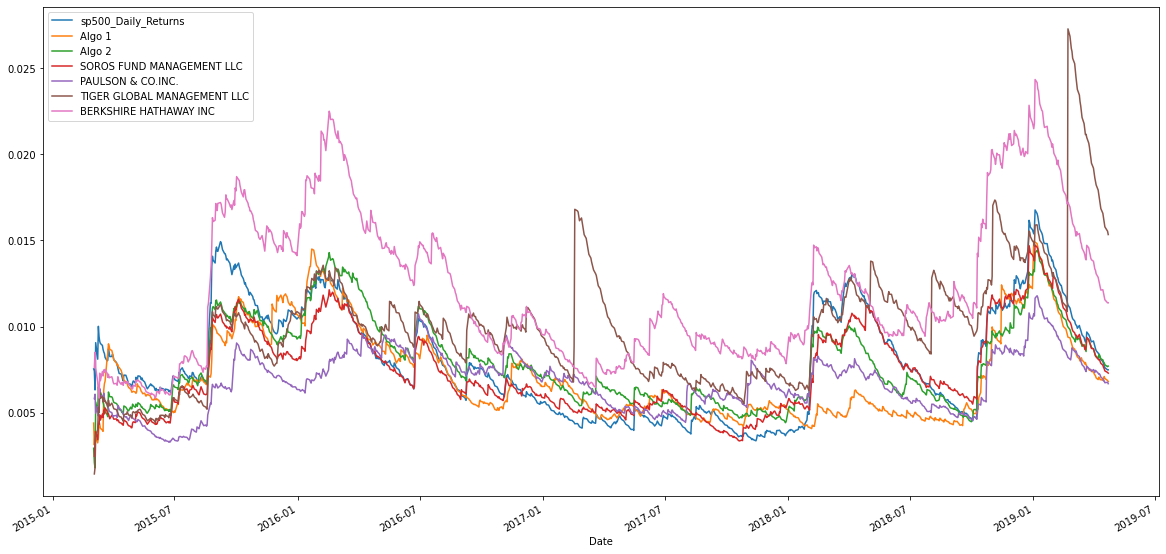

In [25]:
# Use `ewm` to calculate the rolling window
df = W_algo_sp500_returns
ewm = df.ewm(halflife=21, adjust=False).std()
ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratio = (W_algo_sp500_returns.mean()*252) / (W_algo_sp500_returns.std()*np.sqrt(252))
sharpe_ratio.sort_values(ascending=False)


Algo 1                         1.360829
sp500_Daily_Returns            0.658706
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.506929
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

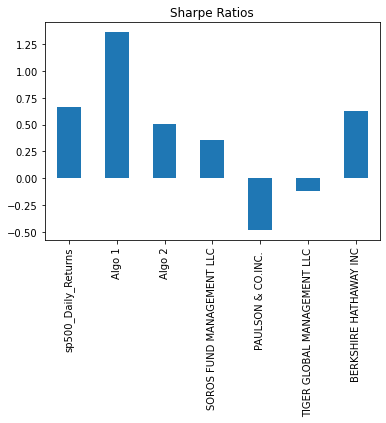

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated


## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
#tesla_path = Path('Resources/Tesla_1Y.csv')
aapl_path = Path('Resources/aapl_historical.csv')
cost_path = Path('Resources/cost_historical.csv')
goog_path = Path('Resources/goog_historical.csv')

In [29]:
# Reading data from 1st stock
# tesla_returns = pd.read_csv(tesla_path, parse_dates=True, index_col="Date", infer_datetime_format=True)


# tesla_returns.dropna()
# tesla_returns.drop(columns=(['Open']), inplace=True)
# tesla_returns.drop(columns=(['Volume']), inplace=True)
# tesla_returns.drop(columns=(['High']), inplace=True)
# tesla_returns.drop(columns=(['Low']), inplace=True)

# tesla_returns.rename(columns={"Close": "TSLA_Close"})

# tesla_returns.pct_change()
# #tesla_dr = tesla_returns.pct_change()
# #tesla_dr.dropna()



In [30]:
# Reading data from 2nd stock
aapl_returns = pd.read_csv(aapl_path, infer_datetime_format=True, parse_dates=True)

#micro_returns.dropna()
#micro_returns.drop(columns=(['Open','Volume','High','Low']), inplace=True)
aapl_returns.drop(columns=(['Symbol']), inplace=True)
aapl_returns.rename(columns={"Trade DATE": "Date", "NOCP": "AAPL"}, inplace = True)
aapl_returns.set_index('Date', inplace=True)
aapl_dr = aapl_returns.pct_change()
aapl_dr.dropna()

#aapl_dr = aapl_dr.rename(columns={"Trade DATE": "Date", "NOCP": "AAPL"}).dropna()


,AAPL
Date,
5/8/2019,0.010861
5/7/2019,-0.000197
5/6/2019,0.027704
5/3/2019,0.015685
5/2/2019,-0.012279
...,...
5/17/2018,0.003650
5/16/2018,0.006364
5/15/2018,-0.009246


In [31]:
# Reading data from 3rd stock
goog_returns = pd.read_csv(goog_path, infer_datetime_format=True, parse_dates=True)
goog_returns.drop(columns=(['Symbol']), inplace=True)
goog_returns.rename(columns={"Trade DATE": "Date", "NOCP": "GOOG"}, inplace = True)
goog_returns.set_index('Date', inplace=True)
goog_dr = goog_returns.pct_change()
goog_dr.dropna()

,GOOG
Date,
5/8/2019,0.003347
5/7/2019,0.006714
5/6/2019,0.013023
5/3/2019,-0.003355
5/2/2019,-0.019226
...,...
5/17/2018,0.011469
5/16/2018,0.002948
5/15/2018,-0.002348


In [32]:
# Reading data from 3rd stock
# nvidia_returns = pd.read_csv(nvidia_path)

# nvidia_returns.dropna()
# nvidia_returns.drop(columns=(['Open','Volume','High','Low']), inplace=True)

# nvidia_dr = nvidia_returns.pct_change()
# nvidia_dr = nvidia_dr.rename(columns={"Close": "NVDA_Close"}).dropna()

In [33]:
# Reading data from 4th stock
cost_returns = pd.read_csv(cost_path, infer_datetime_format=True, parse_dates=True)
cost_returns.drop(columns=(['Symbol']), inplace=True)
cost_returns.rename(columns={"Trade DATE": "Date", "NOCP": "COST"}, inplace = True)
cost_returns.set_index('Date', inplace=True)
cost_dr = cost_returns.pct_change()
cost_dr.dropna()

,COST
Date,
5/8/2019,-0.008749
5/7/2019,-0.004806
5/6/2019,0.016862
5/3/2019,0.001597
5/2/2019,-0.007890
...,...
5/17/2018,0.003217
5/16/2018,-0.004459
5/15/2018,-0.016255


In [34]:
# Combine all stocks in a single DataFrame
custom_port = pd.concat([aapl_dr, goog_dr, cost_dr], axis="columns", join="inner")
custom_port.index = pd.to_datetime(custom_port.index)
custom_port.head()

,AAPL,GOOG,COST
Date,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597


In [35]:
# Reset Date index
#already done

In [36]:
# Reorganize portfolio data by having a column per symbol
#already done 

In [37]:
# Calculate daily returns
#step is already done..
# Drop NAs
custom_port = custom_port.dropna()
# Display sample data
custom_port.sample()
custom_port.dtypes

AAPL    float64
GOOG    float64
COST    float64
dtype: object

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_port = custom_port.dot(weights)
weighted_port.sum()
# Display sample data
weighted_port.sample()


Date
2019-03-27   -0.00165
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
#compare_port = pd.concat([weighted_port, W_algo_sp500_returns], axis="columns", join="inner")
#compare_port = compare_port.rename(columns={"O": "My_Port"})
W_algo_sp500_returns["My_Port"] = weighted_port 
W_algo_sp500_returns

,sp500_Daily_Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,My_Port
Date,,,,,,,,
2015-03-02,0.006125,-0.008158,0.003200,NaN,NaN,NaN,NaN,NaN
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,NaN
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,NaN
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,NaN
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,-0.009149
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,-0.001541
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,-0.001148


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
W_algo_sp500_returns.dropna(inplace =True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
daily_compare_std = W_algo_sp500_returns.std()
annual_compare_std = daily_compare_std*np.sqrt(252)
annual_compare_std

sp500_Daily_Returns            0.151739
Algo 1                         0.133423
Algo 2                         0.139262
SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
My_Port                        0.212687
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

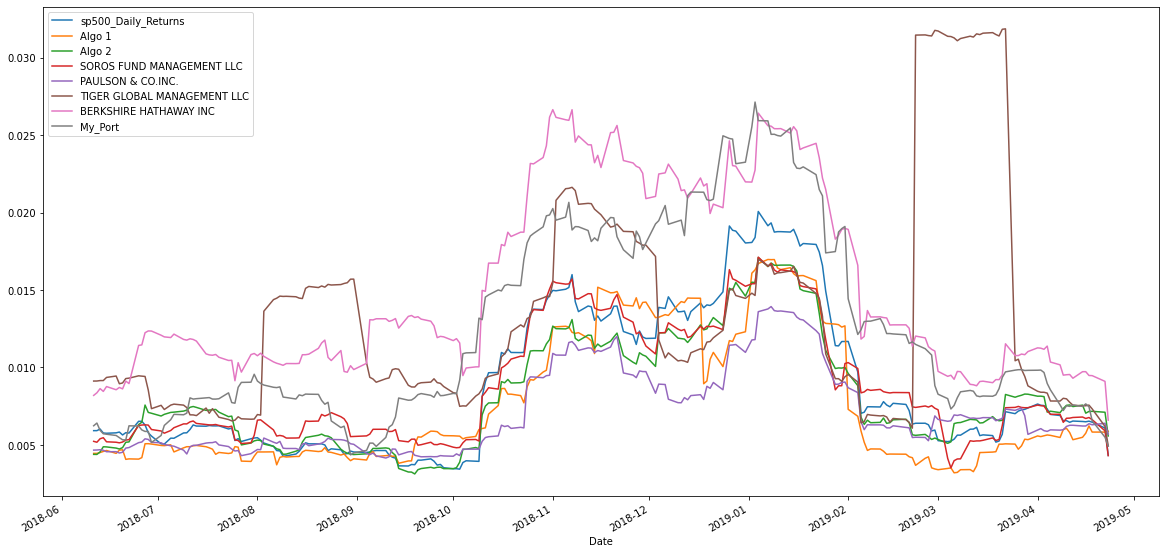

In [46]:
# Calculate rolling standard deviation
compare_Rolling_21_std = W_algo_sp500_returns.rolling(window=21).std()
# Plot rolling standard deviation
compare_Rolling_21_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

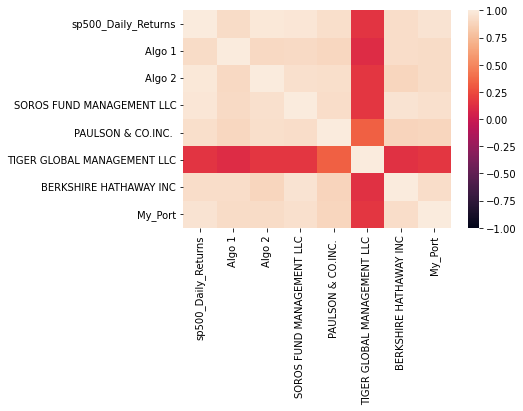

In [47]:
# Calculate and plot the correlation
compare_corr = compare_Rolling_21_std.corr()
compare_corr
# Display de correlation matrix 
sns.heatmap(compare_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta trend 60 day of my Portfolio in comparison to sp500'}, xlabel='Date'>

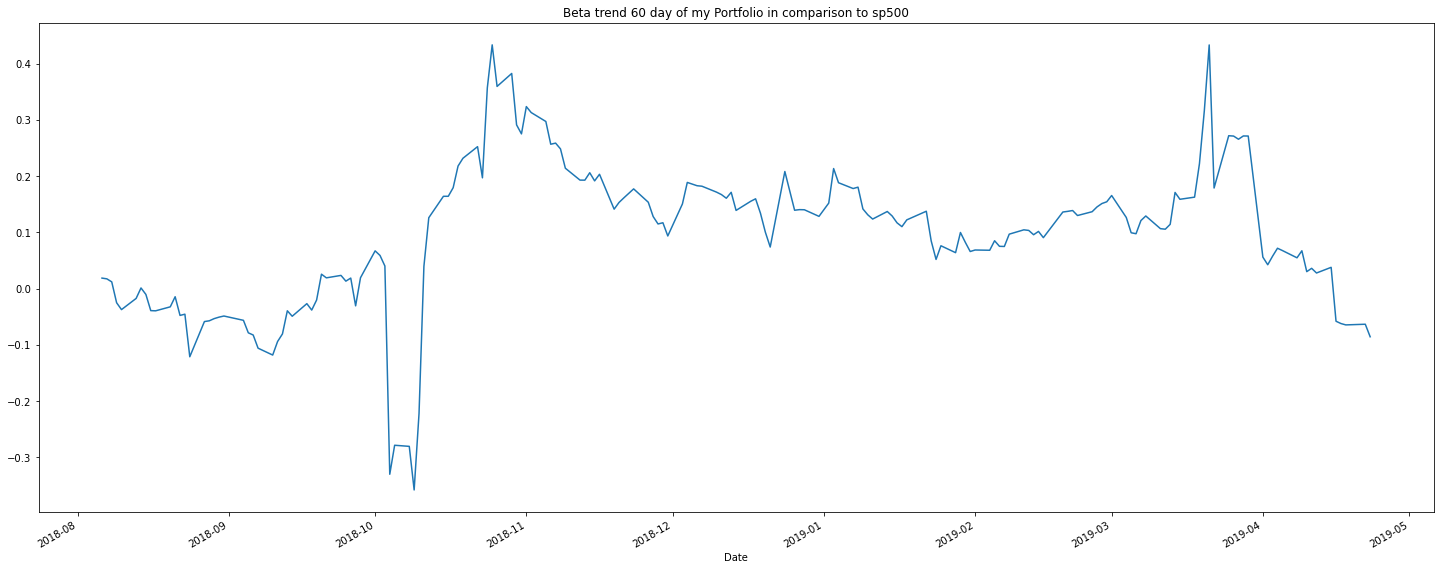

In [49]:
# Calculate and plot Beta
combined_roll_covar = W_algo_sp500_returns['My_Port'].rolling(window=60).cov(W_algo_sp500_returns['sp500_Daily_Returns'])
combined_roll_var = W_algo_sp500_returns['sp500_Daily_Returns'].rolling(window=60).var()
combined_roll_beta = combined_roll_covar / combined_roll_var 
combined_roll_beta.plot(figsize=(25,10), title='Beta trend 60 day of my Portfolio in comparison to sp500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios
combined_sharpe_ratio = (W_algo_sp500_returns.mean()*252) / (W_algo_sp500_returns.std()*np.sqrt(252))
combined_sharpe_ratio.sort_values(ascending=False)

Algo 1                         2.034208
sp500_Daily_Returns            0.595486
SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
BERKSHIRE HATHAWAY INC         0.141691
Algo 2                         0.082577
My_Port                       -0.614330
TIGER GLOBAL MANAGEMENT LLC   -1.019946
dtype: float64

<AxesSubplot:title={'center':'All portfolio Sharpe Ratios'}>

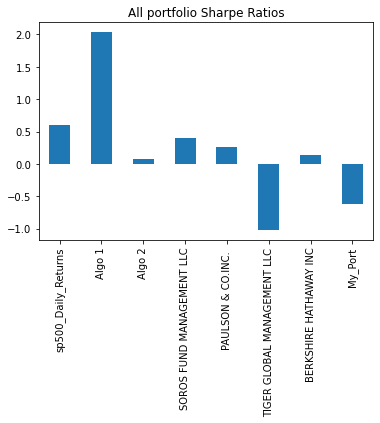

In [51]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot(kind="bar", title="All portfolio Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
#my portfolio does terrible in comparison to the sp500 and Algo's porfolios, and still pretty bad against the whales portfolio 